In [2]:


from forex import *
from oandapyV20.contrib.requests import MarketOrderRequest
from oandapyV20.endpoints.pricing import PricingStream
import oandapyV20
import oandapyV20.endpoints.instruments as instruments
import os
import time
import random
from utils import *
from datetime import datetime
from algos import fify_fify

from matplotlib.pyplot import *
# import matplotlib.pyplot as plt


# Initialize the API client
env = ForexApi("AUD_USD")
# test_client = env.api
a = forex()

# env.update_history()



Started at 1734488693.6738





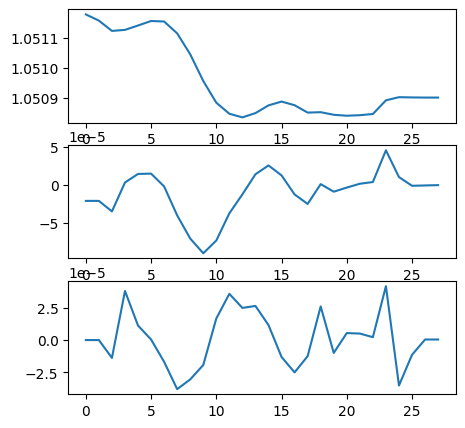

{'order': {'price': '1', 'takeProfitOnFill': {'timeInForce': 'GTC', 'price': '0.94999'}, 'stopLossOnFill': {'timeInForce': 'GTC', 'price': '1.14979'}, 'timeInForce': 'FOK', 'instrument': 'EUR_USD', 'units': '-1000', 'type': 'MARKET', 'positionFill': 'DEFAULT'}}
{'order': {'price': '1', 'takeProfitOnFill': {'timeInForce': 'GTC', 'price': '1.14978'}, 'stopLossOnFill': {'timeInForce': 'GTC', 'price': '0.94998'}, 'timeInForce': 'FOK', 'instrument': 'EUR_USD', 'units': '1000', 'type': 'MARKET', 'positionFill': 'DEFAULT'}}
{'order': {'price': '1', 'takeProfitOnFill': {'timeInForce': 'GTC', 'price': '1.14978'}, 'stopLossOnFill': {'timeInForce': 'GTC', 'price': '0.94998'}, 'timeInForce': 'FOK', 'instrument': 'EUR_USD', 'units': '1000', 'type': 'MARKET', 'positionFill': 'DEFAULT'}}
{'order': {'price': '1', 'takeProfitOnFill': {'timeInForce': 'GTC', 'price': '0.94999'}, 'stopLossOnFill': {'timeInForce': 'GTC', 'price': '1.14979'}, 'timeInForce': 'FOK', 'instrument': 'EUR_USD', 'units': '-1000', 

In [ ]:

env.log_info(log_off=True)
start_time, settings = start(log_off=True)
print("\n")

##### Start of Logic #####

pair = "EUR_USD"

# Preprocessing
fx = forex(pair)
# Close, High, Low, Open
weights = np.array([0,0,0.8,0.1,0.1,0])
history_arr = fx.min.iloc[1:,1:].to_numpy(dtype=float) @ weights

y = np.array(history_arr)

# def smooth_ma(arr_, amt=6):
#     arr = arr_.copy()
#     arr[0] = arr_[0]
#     for j in range(amt):
#         for i in range(2,len(arr)):

#             mid = (arr[i] - arr[i-1])/2
#             arr[i-1] += mid
#             arr[i] -= mid
            
#     return arr



y = smooth_ma(y[len(y) - 30 : ], 3)
y = y[2:]
dy = deriv(y)
ddy = deriv(deriv(y))

f, axes = plt.subplots(3,1, figsize=(5,5))
axes[0].plot(y, label='y')
# axes[0].plot(y_prev, label='y_prev')
axes[1].plot(dy)
axes[2].plot(ddy)
plt.show()

iters = settings['Iterations']
c = 0

ddy = deriv(deriv(y))
hold_position = -1 if ddy[-3] < 0 else 1
current_position = hold_position


env.buy_sell(pair, 1000 * current_position, 999)

# history_arr = history_arr.tolist()

while c < iters:
    val = float(env.get_pair(pair)['prices'][0]['bids'][0]['price'])
    history_arr = np.append(history_arr, val)
    # history_arr.append(val)

    y = smooth_ma(history_arr, 3)
    y = y[2:]
    dy = deriv(y)
    ddy = deriv(deriv(y))
    
    ddy_avg = ddy.mean()
    d1 = ddy[-1]
    hold_position = -1 if ddy[-6] < 0 else 1   
    
    if current_position != hold_position:
        
        env.buy_sell(pair, 1000 * current_position * -1, 999)
        current_position = hold_position
        env.buy_sell(pair, 1000 * current_position, 999)
        print(f"Put a {'Sell' if current_position == -1 else 'Buy'} position on {pair}")


    current_position = hold_position 
    c += 1

    time.sleep(5.01)


plt.legend()


# update the pair
##### End of Logic #####

# env.close_all()
# end(start_time, log_off=True)



In [2]:
arr = [4,2,5, 7,4,3]
arr[-2]

4

In [ ]:



y = arr
# plt.plot(arr) # truth

narr = np.zeros((len(arr),len(arr)))
darr = deriv(arr).reshape(len(arr),1)




NameError: name 'arr' is not defined

In [ ]:

sline = sl
mline = ml

plt_amt = 5

fig = plt.figure(figsize=(10,7))


fig.add_subplot(2,2,1)
plot(ld[-plt_amt:],label="Long")
plot(sd[-plt_amt:],label="Short")
title("EMA")
legend()

fig.add_subplot(2,2,2)
plot(deriv(ld)[-plt_amt:], label="Long")
plot(deriv(sd)[-plt_amt:], label="Short")
title("Deriv EMA")
legend()

fig.add_subplot(2,2,3)
plot(sline[-plt_amt:],label="Sline")
plot(mline[-plt_amt:],label="Mline")
title("MACD")
legend()

fig.add_subplot(2,2,4)
plot(deriv(sline)[-plt_amt:],label="Sline")
plot(deriv(mline)[-plt_amt:],label="Mline")
title("Deriv MACD")
legend()




NameError: name 'sl' is not defined

In [ ]:
cm = sm - lm

# We are looking for short
# c = s - l




a = """
x = s
dx = deriv(s)

position buy/sell


if sum(dx) > 0 and buy:
    hold
    
elif sum dx is neg and pos :
    sell



"""


s = sum(deriv(ld[20:]))

pos = 1

if (s >= 0 and pos == 1) or (s < 0 and pos == -1):
    "hold"
elif (s >= 0 and pos != 1) or (s < 0 and pos != -1):
    "close"
    # switch
    # buy/sell

# plot(deriv(ld[20:]),'g',label="Longd")

# # plot(deriv(sd),'r',label="Short")

# figure(2)
# plot(ld[20:],'g')
# plot(sd[20:],'r')

0.005926541390719908


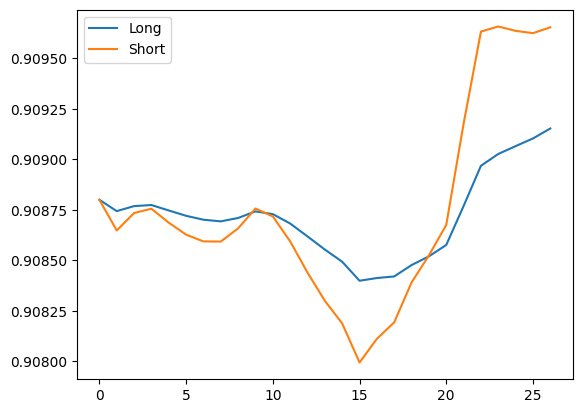

In [ ]:
from matplotlib.pyplot import plot, legend
from forex import forex
f = forex("EURUSD")

plot(lh,label="Long")
plot(sh,label="Short")
legend()




# Forex


In [ ]:
fenv = forex()

arr = fenv.min["Close"].to_numpy()

# l,s,c = calculate_ema_cross(arr)
l,s,c = calculate_macd(arr)
c[c<=0] = -1
c[c>0] = 1

observ_space = np.vstack((arr,l,s))



# RL part

In [ ]:
import gym
from gym import spaces
import numpy as np
from ray.rllib.env import MultiAgentEnv
import yaml

class CustomEnvironment(MultiAgentEnv):
    def __init__(self, config="RL_config.yaml"):
        
        settings = yaml.load(open(config),Loader=yaml.SafeLoader)

        fenv = forex()
        arr = fenv.min["Close"].to_numpy()
        l,s,c = calculate_macd(arr)
        c[c<=0] = -1
        c[c>0] = 1

        observ_space = np.vstack((arr,l,s))
        
        # Define your environment's parameters and configurations here
        self.observation_space = spaces.Box(low=0, high=1, shape=(...,))
        self.action_space = spaces.Discrete(...)
        # Initialize any other variables or components needed

    def reset(self):
        # Reset the environment to its initial state and return the initial observation
        return np.zeros(...)

    def step(self, action):
        # Take a step in the environment based on the given action
        # Calculate the next state, reward, done flag, and info dictionary
        next_observation = np.zeros(...)
        reward = 0
        done = False
        info = {}
        return next_observation, reward, done, info

    def render(self, mode='human'):
        # Render the environment for visualization (optional)
        pass

    def close(self):
        # Clean up resources or do any necessary cleanup (optional)
        pass


In [ ]:
import yaml




{'test': 1}

# ML part

Idea
* Get the model to recognize inflection points and act accordingly


In [ ]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(27,50),
    nn.ReLU(),
    nn.Linear(50,50),
    nn.ReLU(),
    nn.Linear(50,1)
)


Sequential(
  (0): Linear(in_features=27, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=5, bias=True)
)

In [ ]:
# from ray.rllib.algorithms.ppo import PPOConfig
# from ray.tune.logger import pretty_print


# algo = (
#     PPOConfig()
#     .env_runners(num_env_runners=1)
#     .resources(num_gpus=0)
#     .environment(env="CartPole-v1")
#     .build()
# )

# print("training")
# for i in range(10):
#     print(i)
#     result = algo.train()
#     print(pretty_print(result))

#     if i % 5 == 0:
#         checkpoint_dir = algo.save().checkpoint.path
#         print(f"Checkpoint saved in directory {checkpoint_dir}")

